In [1]:
import pandas as pd
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import imblearn as im
from sklearn.model_selection import cross_val_score, KFold




In [2]:
database = pd.read_csv("C:/Users/felix/Documents/McGill MASTERS Class Work/1-Fall 2024/INSY 662/Project/Final Models/database.csv")
#pib = pd.read_csv("C:/Users/felix/Documents/McGill MASTERS Class Work/1-Fall 2024/INSY 662/Project/PIB.csv")
#political_violence = pd.read_csv("C:/Users/felix/Documents/McGill MASTERS Class Work/1-Fall 2024/INSY 662/Project/Political_violence.csv")
#population = pd.read_csv("C:/Users/felix/Documents/McGill MASTERS Class Work/1-Fall 2024/INSY 662/Project/Population_data_by_state.csv")


In [3]:
database

,Number,ID,event_id,victim_id,victim_type,victim_name,victim_gender,party1,party2,party3,...,Male_population,economically_active_population,No_health_services_pop,12_year_old_single_population,ID.1,avg_scholarity,home_count,average_number_in_home,GDP,Concepto
0,1,GRO-2017-12-29,1,1,Authority,Arturo Gómez Pérez,Male,PRD,NaN,NaN,...,1700612,1635187,891961,870839,1415.581378,7.396834,490.228305,3.786890,240749.756,Guerrero
1,2,GRO-2018-01-01,2,2,Party,Adolfo Serna Nogueda,Female,PRI,NaN,NaN,...,1700612,1635187,891961,870839,1415.581378,7.396834,490.228305,3.786890,240749.756,Guerrero
2,3,NAY-2018-01-02,3,3,Authority,Sabino Mejía Rodríguez,Male,PRD,NaN,NaN,...,612278,609556,273039,313489,504.773760,9.300372,498.873967,3.352510,121042.682,Nayarit
3,4,HGO-2018-01-03,4,4,Authority,Miguel Ángel Licona,Male,PRI,NaN,NaN,...,1481379,1502364,928550,805091,908.931328,8.592980,679.918842,3.593099,272452.995,Hidalgo
4,5,HGO-2018-01-03,4,5,Authority,Miguel Ángel Locina Pérez,Male,PAN,NaN,NaN,...,1481379,1502364,928550,805091,908.931328,8.592980,679.918842,3.593099,272452.995,Hidalgo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,2105,ROO-2024-09-14,1763,1984,Authority,No disponible,Male,MORENA,NaN,NaN,...,936779,1006817,468580,482478,549.331407,10.038391,685.666667,3.227987,NaN,NaN
2105,2106,SIN-2024-09-12,1764,1985,Authority,Raúl Demetrio Herrera,Male,No disponible,NaN,NaN,...,1494793,1475672,575096,814574,1985.908101,9.558258,282.078884,3.429745,398152.897,Sinaloa
2106,2107,GTO-2024-09-11,1765,1986,Authority,Tomás Mata Díaz,Male,MORENA,NaN,NaN,...,2996454,2997139,1275190,1678577,1591.657703,8.676868,630.386587,3.849788,701795.455,Guanajuato
2107,2108,GTO-2024-09-02,1766,1987,Authority,Gilberto Zárate,Male,MORENA,NaN,NaN,...,2996454,2997139,1275190,1678577,1591.657703,8.676868,630.386587,3.849788,701795.455,Guanajuato


In [4]:
database.describe()

,Number,event_id,victim_id,INEGIcode,MunINEGIcode,Entity,Totalpopulation,Female_population,Male_population,economically_active_population,No_health_services_pop,12_year_old_single_population,ID.1,avg_scholarity,home_count,average_number_in_home,GDP
count,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2.109000e+03,2.109000e+03,2.109000e+03,2.109000e+03,2.109000e+03,2.109000e+03,2109.000000,2109.000000,2109.000000,2109.000000,1.441000e+03
mean,1055.000000,891.431958,992.999526,16.890944,55.724514,16.890944,5.193460e+06,2.670605e+06,2.522853e+06,2.525438e+06,1.431772e+06,1.391520e+06,1775.378007,8.844357,657.217939,3.577538,4.309682e+05
std,608.960179,502.220958,572.421302,8.022706,75.142392,8.022706,3.351007e+06,1.728157e+06,1.623440e+06,1.690504e+06,1.141995e+06,9.567648e+05,1847.982257,1.001153,143.375424,0.246425,2.937642e+05
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.313910e+05,3.707690e+05,3.606220e+05,3.866420e+05,1.230740e+05,2.016010e+05,187.670270,7.396834,282.078884,3.156682,1.035648e+05
25%,528.000000,461.000000,501.000000,11.000000,10.000000,11.000000,3.082841e+06,1.601462e+06,1.494793e+06,1.502364e+06,7.138590e+05,8.250420e+05,1050.000000,8.089049,619.370812,3.352510,2.407498e+05
50%,1055.000000,900.000000,987.000000,16.000000,31.000000,16.000000,4.132148e+06,2.157305e+06,1.974843e+06,2.010892e+06,1.215990e+06,1.085230e+06,1366.408096,8.676868,635.433962,3.587277,2.616845e+05
75%,1582.000000,1315.000000,1487.000000,21.000000,67.000000,21.000000,6.166934e+06,3.170480e+06,2.996454e+06,2.997139e+06,1.814782e+06,1.678577e+06,1591.657703,9.782062,807.243926,3.786890,5.953933e+05
max,2109.000000,1767.000000,1988.000000,32.000000,568.000000,32.000000,1.699242e+07,8.741123e+06,8.251295e+06,8.544416e+06,5.672574e+06,4.799091e+06,9822.752445,11.668148,927.444444,4.093721,1.216736e+06


<Axes: xlabel='event_type', ylabel='Count'>

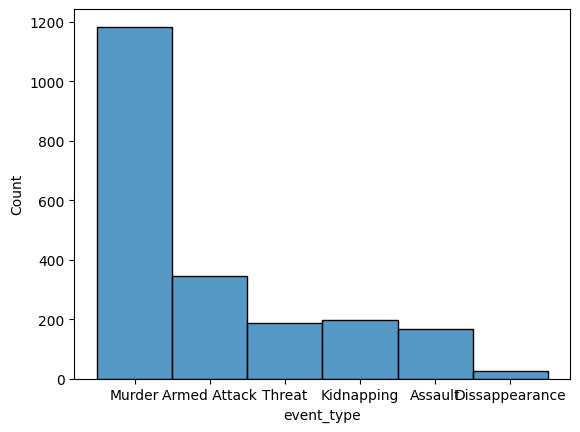

In [5]:
sns.histplot(data=database, x= "event_type")

In [6]:
database.columns

Index(['Number', 'ID', 'event_id', 'victim_id', 'victim_type', 'victim_name',
       'victim_gender', 'party1', 'party2', 'party3', 'party4', 'coallition',
       '1stpoliticaloffice', '2ndpoliticaloffice', '3rdpoliticaloffice',
       'general_category_1', 'general_category_2', 'general_category_3',
       'level_of_government', 'government_area', 'event_type', 'aggressor',
       'remarks_on_the_crime', 'date', 'state', 'municipal', 'INEGIcode',
       'MunINEGIcode', 'Entity', 'Totalpopulation', 'Female_population',
       'Male_population', 'economically_active_population',
       'No_health_services_pop', '12_year_old_single_population', 'ID.1',
       'avg_scholarity', 'home_count', 'average_number_in_home', 'GDP',
       'Concepto'],
      dtype='object')

In [7]:
# database.describe()

# DataSet Prepeation

In [8]:
data = database.drop(columns=["Totalpopulation","ID.1", "ID", "event_id", "Number", "victim_id", "date", "victim_name", "party2", "party3", "party4", "coallition", "1stpoliticaloffice", "2ndpoliticaloffice", "3rdpoliticaloffice", "general_category_2", "general_category_3",   "remarks_on_the_crime", "Concepto", "INEGIcode","MunINEGIcode","aggressor","municipal","level_of_government"])

data['Male_population_proportion'] = data['Male_population'] / (data['Male_population'] + data['Female_population'])
data['Female_population_proportion'] = data['Female_population'] / (data['Male_population'] + data['Female_population'])
data['No_health_proportion'] = data['No_health_services_pop'] / (data['Male_population'] + data['Female_population'])
data['12_year_proportion'] = data['12_year_old_single_population'] / (data['Male_population'] + data['Female_population'])

# Optionally, you can add an economically active proportion

# Drop the original columns since they are now redundant
data = data.drop(columns=['Male_population', 'Female_population', 'economically_active_population', 'Male_population_proportion','No_health_services_pop','12_year_old_single_population'])
#level_of_government, general_category_1government_area, "event_type", "aggressor",

party1              42
government_area     17
GDP                668
dtype: int64


<Axes: >

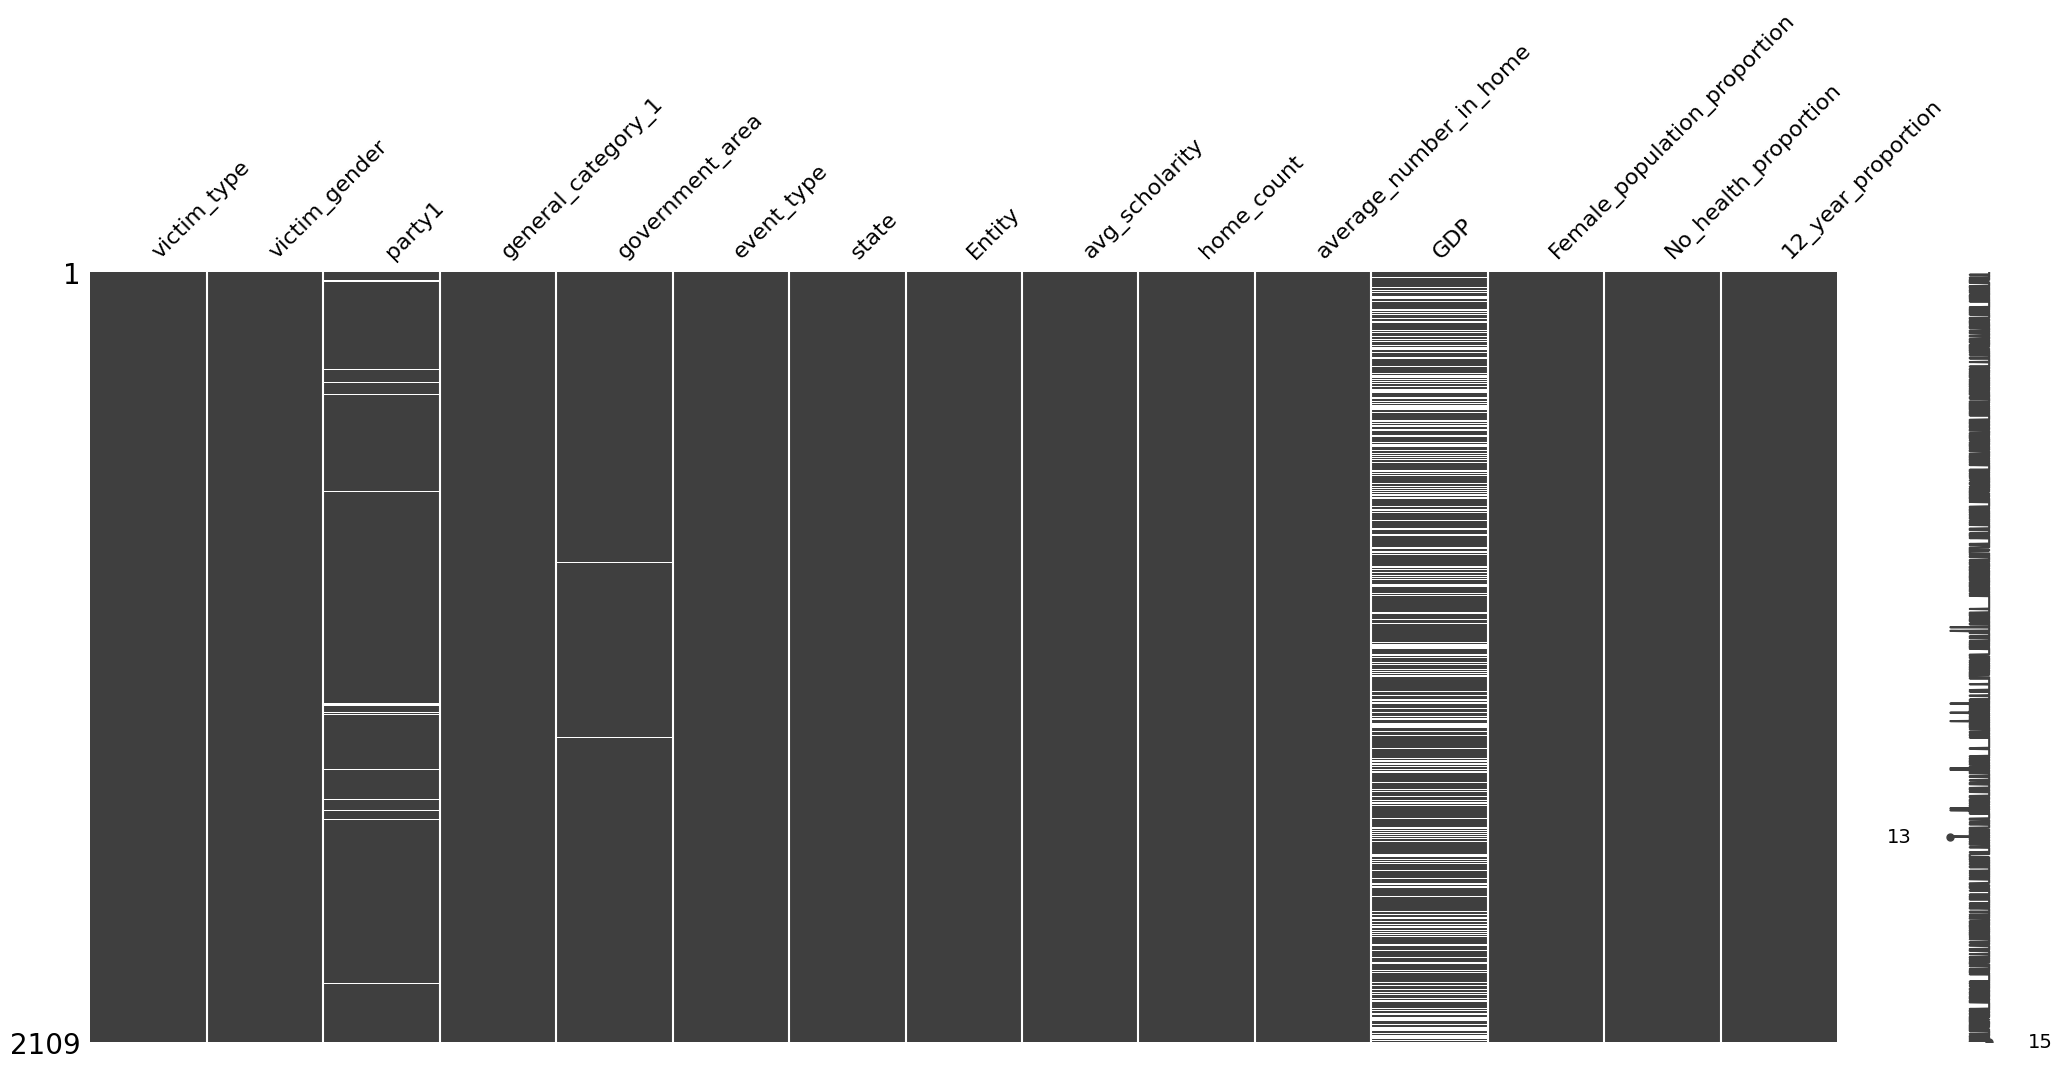

In [9]:
# Check for missing values and only print columns that have missing values
missing_values_with_na = data.isnull().sum()[data.isnull().sum() > 0]
print(missing_values_with_na)

# Visualize missingness using missingno
import missingno as msno
msno.matrix(data)


### Handeling NAN

In [10]:
# #data.dropna(inplace=True)
# # Replace all missing values in the 'Concepto' column with 'Unknown'
# data["Concepto"].fillna("Unknown", inplace=True)

# # Verify that the missing values are replaced
# print(data['Concepto'].isnull().sum())  # Should print 0 if all missing values are replaced


In [11]:
data["GDP"].describe()

gdp_median = data['GDP'].median()
gdp_mean = data['GDP'].mean()


data.loc[data['GDP'].isna(), 'GDP'] = gdp_median

print(data['GDP'].isnull().sum())  # Should print 0 if all missing values are replaced


0


In [12]:
# Fill missing values in the 'party1' column with 'Unknown'
data['party1'].fillna('Unknown', inplace=True)

# Verify the changes
print(data['party1'].isnull().sum())  # This should print 0 if all missing values are replaced

0


C:\Users\felix\AppData\Local\Temp\ipykernel_26840\3995564585.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['party1'].fillna('Unknown', inplace=True)


In [13]:
# # Fill missing values in the 'party1' column with 'Unknown'
# data['government_area'].fillna('Unknown', inplace=True)

# print(data['government_area'].isnull().sum())

data.dropna(subset=['government_area'], inplace=True)

In [14]:
              
# # Fill missing values in the 'party1' column with 'Unknown'
# # data['aggressor'].fillna('Unknown', inplace=True)

# # print(data['aggressor'].isnull().sum()) 

# data.dropna(subset=['aggressor'], inplace=True)

# print(data['aggressor'].isnull().sum())  

In [15]:
# # Drop rows where 'level_of_government' has missing values. 
# # This is because 'level_of_government' has only 2 NA and dropping it wont impact much
# data.dropna(subset=['level_of_government'], inplace=True)

# print(data['level_of_government'].isnull().sum())  

Series([], dtype: int64)


<Axes: >

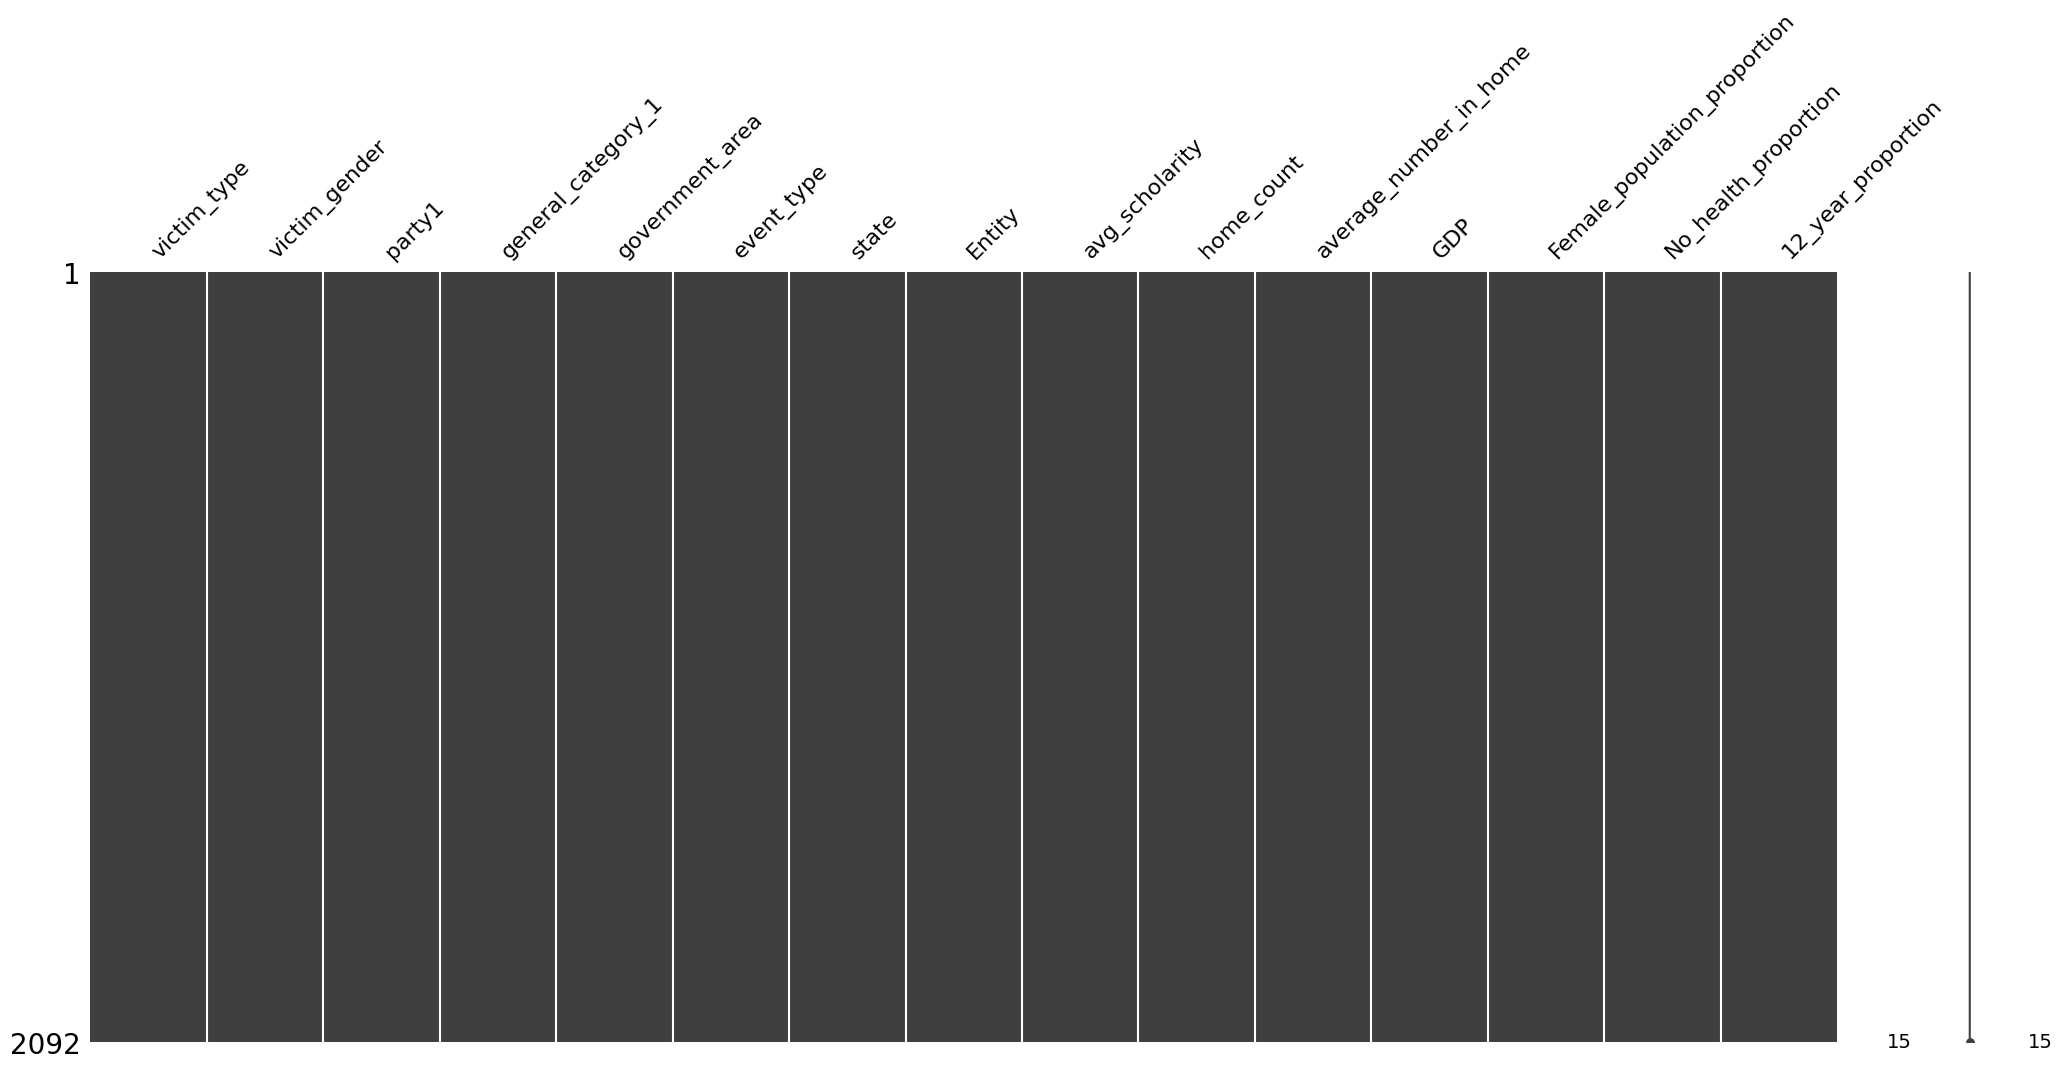

In [16]:
# Check for missing values and only print columns that have missing values
missing_values_with_na = data.isnull().sum()[data.isnull().sum() > 0]
print(missing_values_with_na)

# Visualize missingness using missingno
import missingno as msno
msno.matrix(data)

### Dumifying

In [17]:
# Binery Model (Model 1)
data['event_type_binary'] = np.where(data['event_type'] == 'Murder',1,0)
data = data.drop(columns="event_type")

In [18]:
# Initialize the LabelEncoder (Model 2 Multiple)
# le = LabelEncoder()
# data['event_type'] = le.fit_transform(data['event_type'])
# label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
# print("Label mapping (legend):", label_mapping)

In [19]:
data.dtypes

victim_type                      object
victim_gender                    object
party1                           object
general_category_1               object
government_area                  object
state                            object
Entity                            int64
avg_scholarity                  float64
home_count                      float64
average_number_in_home          float64
GDP                             float64
Female_population_proportion    float64
No_health_proportion            float64
12_year_proportion              float64
event_type_binary                 int64
dtype: object

In [20]:
#dummyfying all None integer columns
string_col = data.select_dtypes(exclude=['int64']).columns
dummy = pd.get_dummies(data[string_col], drop_first = True, dtype = int)
data = pd.concat([data,dummy], axis = 1)
data = data.drop(columns = string_col)

#data = pd.get_dummies(data, columns=['victim_gender', 'party1', 'state', 'municipal', "general_category_1", "level_of_government", "government_area", "event_type", "aggressor", "Concepto"], drop_first=True)



In [21]:
# Model 1 Binary
X = data.drop(columns = ['event_type_binary'])
y = data['event_type_binary']

In [22]:
# Model 2 Multiple
# X = data.drop(columns = ['event_type'])
# y = data['event_type']


#### SMOTE before splitting

In [23]:
# # SMOTE MODEL 2 MULTIPLE

# # Importing necessary libraries
# from imblearn.over_sampling import SMOTE
# import pandas as pd

# # Step 1: Separate the "murder" class from the rest of the event types
# murder_X = X[y == 4]  # Features corresponding to "murder"
# murder_y = y[y == 4]  # Target for "murder"=4

# non_murder_X = X[y!= 4]  # Features for non-"murder" event types
# non_murder_y = y[y != 4]  # Target for non-"murder" event types

# # Step 2: Apply SMOTE to oversample the non-"murder" event types
# smote = SMOTE(sampling_strategy={label: 350 for label in non_murder_y.unique()}, random_state=42)
# non_murder_X_smote, non_murder_y_smote = smote.fit_resample(non_murder_X, non_murder_y)

# # Step 3: Combine the original "murder" data with the SMOTE-augmented non-"murder" data
# X_combined = pd.concat([murder_X, non_murder_X_smote])
# y_combined = pd.concat([murder_y, non_murder_y_smote])

# # Step 4: Shuffle the combined dataset to ensure randomness
# combined_data = pd.concat([X_combined, y_combined], axis=1)
# combined_data = combined_data.sample(frac=1, random_state=42).reset_index(drop=True)
# data = combined_data

# # Step 5: Checking class distribution after SMOTE
# print('Final class distribution after SMOTE:')
# print(combined_data['event_type'].value_counts())


#### Undersampling

In [24]:
# # Importing necessary libraries
# from imblearn.under_sampling import RandomUnderSampler
# import pandas as pd

# # Step 1: Ensure indices are aligned
# X = X.reset_index(drop=True)
# y = y.reset_index(drop=True)

# # Step 2: Apply RandomUnderSampler to undersample the "murder" class while keeping others intact
# # Sampling strategy is applied only to the class '4' (murder), leaving others as they are.
# undersample = RandomUnderSampler(sampling_strategy={4: 600}, random_state=42)  
# X_under, y_under = undersample.fit_resample(X, y)

# # Step 3: Shuffle the undersampled dataset to ensure randomness
# combined_data = pd.concat([X_under, y_under], axis=1)
# combined_data = combined_data.sample(frac=1, random_state=42).reset_index(drop=True)

# # Step 4: Checking class distribution after undersampling
# print('Final class distribution after undersampling:')
# print(y_under.value_counts())


In [25]:
# # Model 2 Multiple
# X = data.drop(columns = ['event_type'])
# y = data['event_type']

# Model Prepeartion

### Splitting data

In [26]:
# Worst so not using
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [27]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
X_train = X
X_test = X
y_train = y
y_test = y

### Scaling

In [28]:
data.describe()

scaler = StandardScaler()
X_train_std = X_train.copy()
X_train_std = pd.DataFrame(scaler.fit_transform(X_train_std), columns = X_train.columns)

X_test_std = X_test.copy()
X_test_std = pd.DataFrame(scaler.transform(X_test_std), columns = X_test.columns)

#### SMOTE after splitting

In [29]:
# # Importing necessary libraries
# from imblearn.over_sampling import SMOTE
# import pandas as pd


# # Step 1: Ensure the indices are aligned for X_train_std and y_train
# X_train_std = X_train_std.reset_index(drop=True)
# y_train = y_train.reset_index(drop=True)

# # Step 1: Separate the "murder" class from the rest of the event types
# murder_X = X_train_std[y_train == 4]  # Features corresponding to "murder"
# murder_y = y_train[y_train == 4]  # Target for "murder"

# non_murder_X = X_train_std[y_train != 4]  # Features for non-"murder" event types
# non_murder_y = y_train[y_train != 4]  # Target for non-"murder" event types

# # Step 2: Apply SMOTE to oversample the non-"murder" event types
# smote = SMOTE(sampling_strategy={label: 800 for label in non_murder_y.unique()}, random_state=42)
# non_murder_X_smote, non_murder_y_smote = smote.fit_resample(non_murder_X, non_murder_y)

# # Step 3: Combine the original "murder" data with the SMOTE-augmented non-"murder" data
# X_combined = pd.concat([murder_X, non_murder_X_smote])
# y_combined = pd.concat([murder_y, non_murder_y_smote])

# # Step 4: Shuffle the combined dataset to ensure randomness
# combined_data = pd.concat([X_combined, y_combined], axis=1)
# combined_data = combined_data.sample(frac=1, random_state=42).reset_index(drop=True)
# data = combined_data

# # Step 5: Checking class distribution after SMOTE
# print('Final class distribution after SMOTE:')
# print(combined_data['event_type'].value_counts())


## Correlation 

In [30]:
# # Calculate Pearson correlation between each feature and the target 'event_type'
# import seaborn as sns

# numerical_columns = data.select_dtypes(include=['float64', 'int64'])
# corr_matrix = numerical_columns.corr()

# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title('Correlation Matrix Heatmap')
# plt.show()



In [31]:
# # Compute the correlation matrix
# correlation_matrix = data.corr()

# # Apply a mask to only show correlations above 0.5 or below -0.5 (excluding self-correlations)
# filtered_corr = correlation_matrix[(correlation_matrix >= 0.5) | (correlation_matrix <= -0.5)]

# # Loop through the filtered correlation matrix to find and print the correlated variables
# print("Highly correlated variables (|corr| > 0.5):")
# for col in filtered_corr.columns:
#     for idx in filtered_corr.index:
#         # Only print correlations above 0.5 or below -0.5 and skip self-correlation
#         if filtered_corr.loc[idx, col] > 0.5 or filtered_corr.loc[idx, col] < -0.5:
#             if idx != col:  # Skip diagonal (self-correlation)
#                 print(f"{idx}  - and - {col} -  have a correlation of --- {filtered_corr.loc[idx, col]:.2f}\n")


In [32]:

# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # Assume X is your features dataframe for VIF calculation
# X_vif = X_train_std.copy()  # Make a copy of the training features

# # Add the intercept for VIF calculation
# X_vif['Intercept'] = 1

# # Calculate VIF for each feature
# vif_data = pd.DataFrame()
# vif_data['Feature'] = X_vif.columns
# vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# # Remove the 'Intercept' from the results (since it's not a feature of interest)
# vif_data = vif_data[vif_data['Feature'] != 'Intercept']

# # Filter and display only features with VIF > 8
# high_vif = vif_data[vif_data['VIF'] > 8]

# # Display the results
# print("Features with VIF > 8:")
# print(high_vif)

# # Assume X is your features dataframe for VIF calculation
# X_vif = X_train_std.copy()  # Make a copy of the training features

# # Add the intercept for VIF calculation
# X_vif['Intercept'] = 1

# # Calculate VIF for each feature
# vif_data = pd.DataFrame()
# vif_data['Feature'] = X_vif.columns
# vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# # Remove the 'Intercept' from the results (since it's not a feature of interest)
# vif_data = vif_data[vif_data['Feature'] != 'Intercept']

# # Filter and display only features with VIF > 8
# high_vif = vif_data[vif_data['VIF'] > 8]

# # Display the results
# print("Features with VIF > 8:")
# print(high_vif)


# Feature Slection

## Lasso Feature Selection

In [33]:
lasso = Lasso(alpha=0.01)

lasso.fit(X_train_std, y_train)

lasso_coefficients = lasso.coef_

feature_names = X.columns
selected_features_lasso = feature_names[lasso_coefficients != 0]

print("Selected features:", selected_features_lasso)
selected_features_count = np.sum(lasso_coefficients != 0)
print(f"Number of selected features: {selected_features_count}")


Selected features: Index(['victim_type_Facility', 'victim_gender_Male',
       'victim_gender_Not Available', 'party1_FPM', 'party1_MC',
       'party1_MORELOS PROGRESA', 'party1_MORENA', 'party1_Morelos Progresa',
       'party1_No disponible', 'party1_PAN', 'party1_PAS', 'party1_PES',
       'party1_Partido Apoyo Social', 'party1_Partido Baja California (PBC)',
       'party1_Partido Popular Chiapaneco', 'party1_Partido del Bienestar',
       'party1_Podemos Mover a Chiapas', 'party1_RSP', 'party1_Unknown',
       'general_category_1_Candidato(a)', 'general_category_1_Diputado(a)',
       'general_category_1_Ex-Alcalde(sa)',
       'general_category_1_Ex-Candidato(a)',
       'general_category_1_Ex-Funcionario(a)',
       'general_category_1_Ex-Regidor(a)', 'general_category_1_Ex-Síndico(a)',
       'general_category_1_Familiar', 'general_category_1_Funcionario',
       'general_category_1_Funcionario(a)', 'general_category_1_Gobernador(a)',
       'general_category_1_Militante', 'ge

## Random Forest feature slection

In [34]:

# Initialize and fit the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_std, y_train)

# Get the feature importance scores from the trained Random Forest model
rf_importances = rf.feature_importances_

# Define feature names
feature_names = X.columns

# Select features with non-zero importance
selected_features_rf = feature_names[rf_importances > 0]  # Adjust the threshold if needed

# Print selected features
print("Selected features:", selected_features_rf)

# Count the number of selected features
selected_features_count = np.sum(rf_importances > 0)
print(f"Number of selected features: {selected_features_count}")





Selected features: Index(['Entity', 'victim_type_Facility', 'victim_type_Party',
       'victim_gender_Female', 'victim_gender_Male',
       'victim_gender_Not Available', 'party1_Chiapas Unido', 'party1_FPM',
       'party1_Fernando Pérez Vega', 'party1_Futuro',
       ...
       'state_Quintana_Roo', 'state_San_Luis_Potosi', 'state_Sinaloa',
       'state_Sonora', 'state_Tabasco', 'state_Tamaulipas', 'state_Tlaxcala',
       'state_Veracruz_de_Ignacio_de_la_Llave', 'state_Yucatan',
       'state_Zacatecas'],
      dtype='object', length=105)
Number of selected features: 105


# Model Testing and Feature importnace

## Random Forest Model

Model 3 - Random Forest Predictors (Classification):
Classification Accuracy: 0.7901529636711281
Precision: 0.794873521237598
Recall: 0.7901529636711281
Model Training Time: 5.3427650928497314 seconds

Top 10 Factors Contributing to News Article Popularity (Random Forest Predictors):
general_category_1_Funcionario(a)                               0.076912
victim_gender_Male                                              0.033174
government_area_Executive                                       0.021654
general_category_1_Familiar                                     0.021272
state_Chiapas                                                   0.019551
government_area_Seguridad (e.g. policías; fuerzas del orden)    0.019073
general_category_1_Candidato(a)                                 0.018834
general_category_1_Ex-Funcionario(a)                            0.016635
general_category_1_Ex-Candidato(a)                              0.016396
general_category_1_Militante                              

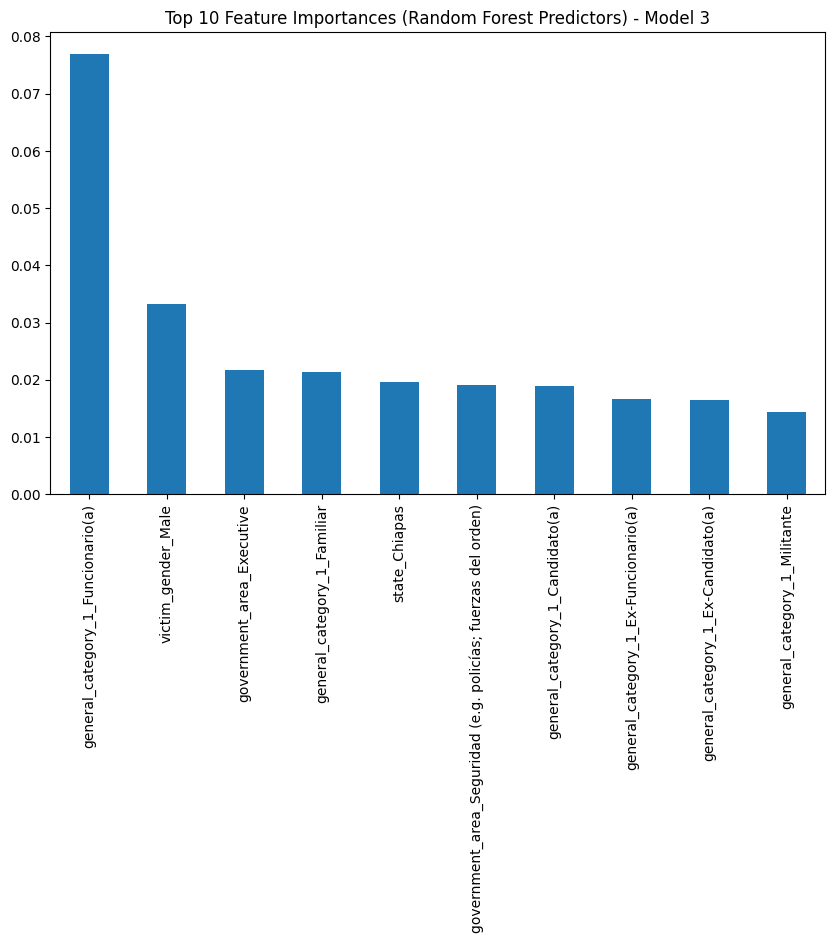

In [35]:
X_train_rf = X_train_std[selected_features_rf]
X_test_rf = X_test_std[selected_features_rf]

mlp_rf_predictors = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=0)

start_time_rf = time()
mlp_rf_predictors.fit(X_train_rf, y_train)
training_time_rf = time() - start_time_rf

y_test_pred_rf = mlp_rf_predictors.predict(X_test_rf)

accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
precision_rf = precision_score(y_test, y_test_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_test_pred_rf, average='weighted')

print("Model 3 - Random Forest Predictors (Classification):")
print(f"Classification Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"Model Training Time: {training_time_rf} seconds")

########## FEATURE IMPORTANCE ############################

result = permutation_importance(mlp_rf_predictors, X_test_rf, y_test, n_repeats=10, random_state=0)

perm_importance = pd.Series(result.importances_mean, index=X_train_rf.columns)

sorted_importance = perm_importance.sort_values(ascending=False)

feature = 10

top_3_features = sorted_importance.head(feature)

print(f"\nTop {feature} Factors Contributing to News Article Popularity (Random Forest Predictors):")
print(top_3_features)

top_3_features.plot(kind='bar', figsize=(10, 6), title=f'Top {feature} Feature Importances (Random Forest Predictors) - Model 3')
plt.show()


## Lasso Regression

Model 2 - LASSO Predictors (Classification):
Classification Accuracy: 0.765774378585086
Precision: 0.7674015521412795
Recall: 0.765774378585086
Model Training Time: 4.923795700073242 seconds

Top 10 Factors Contributing to event type:
general_category_1_Candidato(a)                                 0.049761
victim_gender_Male                                              0.027964
general_category_1_Funcionario(a)                               0.026338
government_area_Seguridad (e.g. policías; fuerzas del orden)    0.023279
party1_MORENA                                                   0.017734
state_Chiapas                                                   0.016922
general_category_1_Familiar                                     0.014866
state_Oaxaca                                                    0.014771
victim_type_Facility                                            0.013480
state_Guerrero                                                  0.012906
dtype: float64


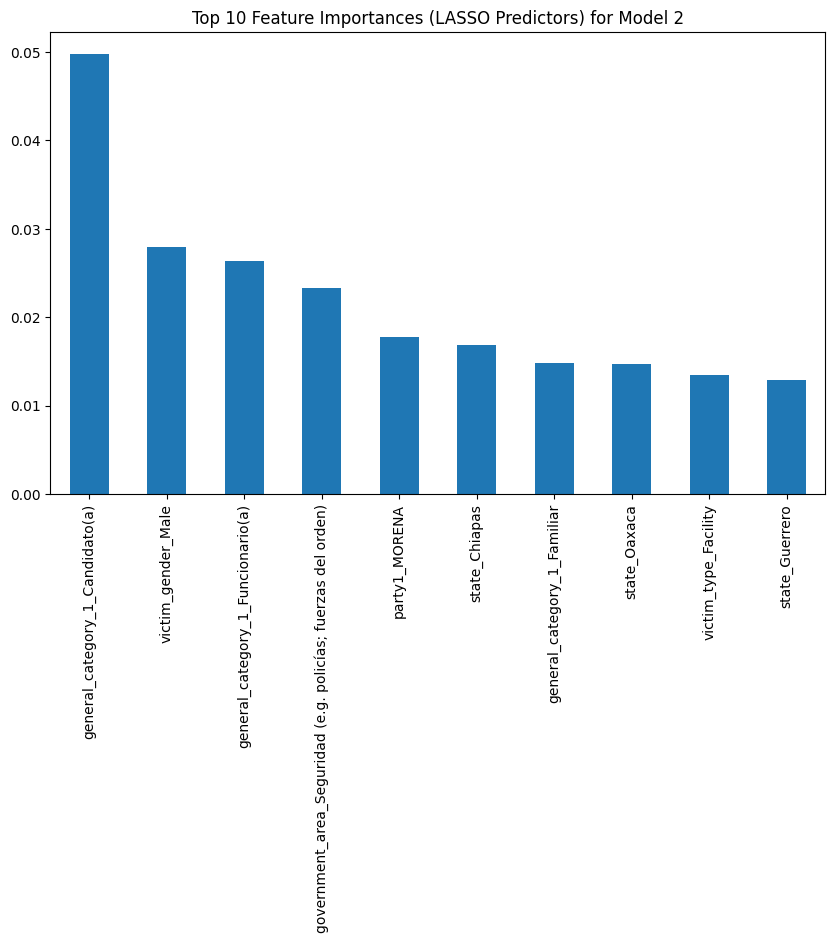

In [36]:
X_train_lasso = X_train_std[selected_features_lasso]
X_test_lasso = X_test_std[selected_features_lasso]

mlp_lasso_predictors = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=0)

start_time_lasso = time()
mlp_lasso_predictors.fit(X_train_lasso, y_train)
training_time_lasso = time() - start_time_lasso

y_test_pred_lasso = mlp_lasso_predictors.predict(X_test_lasso)

accuracy_lasso = accuracy_score(y_test, y_test_pred_lasso)
precision_lasso = precision_score(y_test, y_test_pred_lasso, average='weighted')
recall_lasso = recall_score(y_test, y_test_pred_lasso, average='weighted')

print("Model 2 - LASSO Predictors (Classification):")
print(f"Classification Accuracy: {accuracy_lasso}")
print(f"Precision: {precision_lasso}")
print(f"Recall: {recall_lasso}")
print(f"Model Training Time: {training_time_lasso} seconds")

################## Featuer Importance ############################
result = permutation_importance(mlp_lasso_predictors, X_test_lasso, y_test, n_repeats=10, random_state=0)

perm_importance = pd.Series(result.importances_mean, index=X_test_lasso.columns)

sorted_importance = perm_importance.sort_values(ascending=False)

feature = 10

top_3_features = sorted_importance.head(feature)

print(f"\nTop {feature} Factors Contributing to event type:")
print(top_3_features)

top_3_features.plot(kind='bar', figsize=(10, 6), title=f'Top {feature} Feature Importances (LASSO Predictors) for Model 2')
plt.show()


# Grid Search

In [37]:

# Example for MLP tuning
"""
maxnumiteration = 500
randomstate = 0

parameter_space = {
    'hidden_layer_sizes': [(5,), (10,), (15,)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.05, 0.1],
    'learning_rate': ['constant', 'adaptive'],
}

start_time_gridCV = time()
mlp = MLPClassifier(max_iter=maxnumiteration,random_state = randomstate)
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train_std, y_train)
training_time_gridCV = time() - start_time_gridCV


# Best parameter combination
print('Best parameters found:\n', clf.best_params_)
print("Best cross-validation score:", clf.best_score_)
print("Best estimator:\n", clf.best_estimator_)
print("Best index:\n", clf.best_index_)
print("Scorer:\n", clf.scorer_)
print(f"Grid Search Training Time: {training_time_gridCV} seconds")
"""


'\nmaxnumiteration = 500\nrandomstate = 0\n\nparameter_space = {\n    \'hidden_layer_sizes\': [(5,), (10,), (15,)],\n    \'activation\': [\'tanh\', \'relu\'],\n    \'solver\': [\'adam\', \'sgd\'],\n    \'alpha\': [0.0001, 0.05, 0.1],\n    \'learning_rate\': [\'constant\', \'adaptive\'],\n}\n\nstart_time_gridCV = time()\nmlp = MLPClassifier(max_iter=maxnumiteration,random_state = randomstate)\nclf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)\nclf.fit(X_train_std, y_train)\ntraining_time_gridCV = time() - start_time_gridCV\n\n\n# Best parameter combination\nprint(\'Best parameters found:\n\', clf.best_params_)\nprint("Best cross-validation score:", clf.best_score_)\nprint("Best estimator:\n", clf.best_estimator_)\nprint("Best index:\n", clf.best_index_)\nprint("Scorer:\n", clf.scorer_)\nprint(f"Grid Search Training Time: {training_time_gridCV} seconds")\n'

# KNN Models with feature selection

## KNN Moodel Lasso Feature Selection

In [38]:
X_train_knnlasso = X_train_std[selected_features_lasso]
X_test_knnlasso = X_test_std[selected_features_lasso]

print(f"Number of features selected by LASSO: {X_train_knnlasso.columns.size}")

Number of features selected by LASSO: 54


In [39]:
from sklearn.neighbors import KNeighborsClassifier




n_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

accuracy = 0

for n in n_list:
    knnlasso = KNeighborsClassifier(n_neighbors=n)
    knnlasso.fit(X_train_knnlasso, y_train)

    # Predict on the test set
    y_pred_knn = knnlasso.predict(X_test_knnlasso)

    # Evaluate accuracy
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    print(f"KNN Accuracy: {accuracy_knn}, with {n} neighbors")

    if accuracy_knn > accuracy:
        accuracy = accuracy_knn
        best_n_lasso = n

print(f"\nBest KNN Accuracy: {accuracy}, with {best_n_lasso} neighbors")

KNN Accuracy: 0.7633843212237094, with 1 neighbors
KNN Accuracy: 0.719885277246654, with 2 neighbors
KNN Accuracy: 0.7476099426386233, with 3 neighbors
KNN Accuracy: 0.7318355640535373, with 4 neighbors
KNN Accuracy: 0.7552581261950286, with 5 neighbors
KNN Accuracy: 0.7366156787762906, with 6 neighbors
KNN Accuracy: 0.7466539196940727, with 7 neighbors
KNN Accuracy: 0.7361376673040153, with 8 neighbors
KNN Accuracy: 0.7418738049713193, with 9 neighbors
KNN Accuracy: 0.739961759082218, with 10 neighbors
KNN Accuracy: 0.738527724665392, with 11 neighbors
KNN Accuracy: 0.7347036328871893, with 12 neighbors
KNN Accuracy: 0.7337476099426387, with 13 neighbors
KNN Accuracy: 0.734225621414914, with 14 neighbors
KNN Accuracy: 0.7294455066921606, with 15 neighbors
KNN Accuracy: 0.7308795411089866, with 16 neighbors
KNN Accuracy: 0.7280114722753346, with 17 neighbors
KNN Accuracy: 0.7289674952198852, with 18 neighbors
KNN Accuracy: 0.7280114722753346, with 19 neighbors
KNN Accuracy: 0.729445506

## KNN Moodel with Random Forest Feature Selection

In [40]:
X_train_knnrf = X_train_std[selected_features_rf]
X_test_knnrf = X_test_std[selected_features_rf]

print(f"Number of features selected by Random Forest: {X_train_knnrf.columns.size}")

Number of features selected by Random Forest: 105


In [41]:
from sklearn.neighbors import KNeighborsClassifier



n_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

accuracy = 0

for n in n_list:
    knnrf = KNeighborsClassifier(n_neighbors=n)
    knnrf.fit(X_train_knnrf, y_train)

    # Predict on the test set
    y_pred_knn = knnrf.predict(X_test_knnrf)

    # Evaluate accuracy
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    print(f"KNN Accuracy: {accuracy_knn}, with {n} neighbors")

    if accuracy_knn > accuracy:
        accuracy = accuracy_knn
        best_n_rf = n

print(f"\nBest KNN Accuracy: {accuracy}, with {best_n_rf} neighbors")

best_k = best_n_rf

# Train the final KNN model with the optimal k value
knn_final_rf = KNeighborsClassifier(n_neighbors=best_k)
knn_final_rf.fit(X_train_std, y_train)


KNN Accuracy: 0.8288718929254302, with 1 neighbors
KNN Accuracy: 0.747131931166348, with 2 neighbors
KNN Accuracy: 0.7710325047801148, with 3 neighbors
KNN Accuracy: 0.739961759082218, with 4 neighbors
KNN Accuracy: 0.7590822179732314, with 5 neighbors
KNN Accuracy: 0.7490439770554493, with 6 neighbors
KNN Accuracy: 0.748565965583174, with 7 neighbors
KNN Accuracy: 0.7428298279158699, with 8 neighbors
KNN Accuracy: 0.7466539196940727, with 9 neighbors
KNN Accuracy: 0.7433078393881453, with 10 neighbors
KNN Accuracy: 0.739961759082218, with 11 neighbors
KNN Accuracy: 0.737093690248566, with 12 neighbors
KNN Accuracy: 0.732791586998088, with 13 neighbors
KNN Accuracy: 0.7304015296367112, with 14 neighbors
KNN Accuracy: 0.7294455066921606, with 15 neighbors
KNN Accuracy: 0.7270554493307839, with 16 neighbors
KNN Accuracy: 0.7241873804971319, with 17 neighbors
KNN Accuracy: 0.7289674952198852, with 18 neighbors
KNN Accuracy: 0.72131931166348, with 19 neighbors
KNN Accuracy: 0.7179732313575

KNeighborsClassifier(n_neighbors=1)

## KNN Model (no feature selection)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

n_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

accuracy = 0

for n in n_list:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_std, y_train)

    # Predict on the test set
    y_pred_knn = knn.predict(X_test_std)

    # Evaluate accuracy
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    print(f"KNN Accuracy: {accuracy_knn}, with {n} neighbors")

    if accuracy_knn > accuracy:
        if n == 1:
            continue
        else:
            accuracy = accuracy_knn
            best_n = n

print(f"\nBest KNN Accuracy: {accuracy}, with {best_n} neighbors")

KNN Accuracy: 0.8288718929254302, with 1 neighbors
KNN Accuracy: 0.747131931166348, with 2 neighbors
KNN Accuracy: 0.7710325047801148, with 3 neighbors
KNN Accuracy: 0.739961759082218, with 4 neighbors
KNN Accuracy: 0.7590822179732314, with 5 neighbors
KNN Accuracy: 0.7490439770554493, with 6 neighbors
KNN Accuracy: 0.748565965583174, with 7 neighbors
KNN Accuracy: 0.7428298279158699, with 8 neighbors
KNN Accuracy: 0.7466539196940727, with 9 neighbors
KNN Accuracy: 0.7433078393881453, with 10 neighbors
KNN Accuracy: 0.739961759082218, with 11 neighbors
KNN Accuracy: 0.737093690248566, with 12 neighbors
KNN Accuracy: 0.732791586998088, with 13 neighbors
KNN Accuracy: 0.7304015296367112, with 14 neighbors
KNN Accuracy: 0.7294455066921606, with 15 neighbors
KNN Accuracy: 0.7270554493307839, with 16 neighbors
KNN Accuracy: 0.722753346080306, with 17 neighbors
KNN Accuracy: 0.7275334608030593, with 18 neighbors
KNN Accuracy: 0.719885277246654, with 19 neighbors
KNN Accuracy: 0.7179732313575

In [43]:
from sklearn.neighbors import KNeighborsClassifier

best_k = best_n

# Train the final KNN model with the optimal k value
knn_V2 = KNeighborsClassifier(n_neighbors=best_k)
knn_V2.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
# Predict on the test set
y_test_pred = knn_V2.predict(X_test_std)

# Evaluate the accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test set accuracy: {accuracy}")

# Print a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))


Test set accuracy: 0.7710325047801148
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       920
           1       0.79      0.80      0.80      1172

    accuracy                           0.77      2092
   macro avg       0.77      0.77      0.77      2092
weighted avg       0.77      0.77      0.77      2092



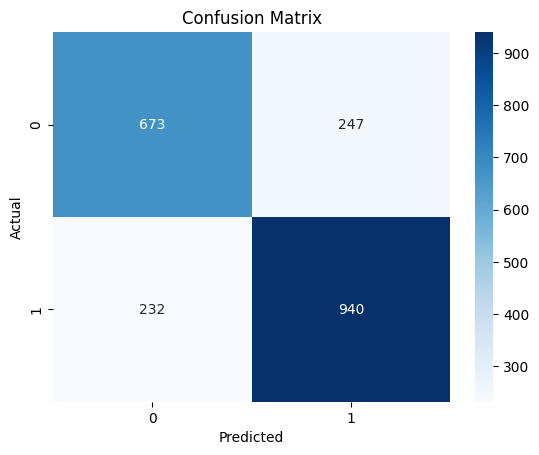

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# PERMUATION (with KNN final - which had a Random Forest feature selection)

In [46]:
# from sklearn.inspection import permutation_importance

# start_time_permutation = time()

# # Calculate permutation importance
# result = permutation_importance(knn_final_rf, X_test_std, y_test, n_repeats=10, random_state=42)

# # Create a pandas series for feature importance and name the column "Feature_Importance"
# importance_df = pd.Series(result.importances_mean, index=X_train.columns, name="Feature_Importance")

# training_time_permutation = time() - start_time_permutation




# print(f"Permutation Importance Training Time: {training_time_permutation} seconds; {training_time_permutation/60} minutes")

In [47]:
# highest_importance = importance_df[importance_df >= 0.001]

# highest_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
# plt.title('Feature Importance via Permutation')
# plt.show()

In [48]:
# print(highest_importance.sort_values(ascending=False))

In [49]:
# lowest_importance = importance_df[importance_df < 0]

# lowest_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
# plt.title('Feature Importance via Permutation')
# plt.show()

In [50]:
# # Top 10 highest feature importance
# top_10_highest = importance_df.sort_values(ascending=False).head(20)
# print("Top 10 Highest Feature Importance:\n", top_10_highest)

# # Top 10 lowest feature importance
# top_10_lowest = importance_df.sort_values(ascending=True).head(20)
# print("\nTop 10 Lowest Feature Importance:\n", top_10_lowest)


In [51]:
# importantfeatures = importance_df[importance_df > 0.001]
# selected_columns_perm = importantfeatures[importantfeatures != 0].index

# print("Selected columns with non-zero importance:", selected_columns_perm)
# print("Number of selected features:", len(selected_columns_perm))



# KNN with permutation filtering from RF filtering

In [52]:
# X_train_knnperm = X_train_std[selected_columns_perm]
# X_test_knnperm = X_test_std[selected_columns_perm]

# print(f"Number of features selected by Random Forest and then trhough a permuation of that KNN: {X_train_knnperm.columns.size}")

In [53]:
# n_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# accuracy = 0

# for n in n_list:
#     knnrf = KNeighborsClassifier(n_neighbors=n)
#     knnrf.fit(X_train_knnperm, y_train)

#     # Predict on the test set
#     y_pred_knn = knnrf.predict(X_test_knnperm)

#     # Evaluate accuracy
#     accuracy_knn = accuracy_score(y_test, y_pred_knn)
#     print(f"KNN Accuracy: {accuracy_knn}, with {n} neighbors")

#     if accuracy_knn > accuracy:
#         accuracy = accuracy_knn
#         best_n_rf_perm = n

# print(f"\nBest KNN Accuracy: {accuracy}, with {best_n_rf_perm} neighbors")

### Model Fitting

In [54]:
# best_k = 5  
# print(f"\nBest K: {best_k}")

# # Train the final KNN model with the optimal k value
# knn_V3 = KNeighborsClassifier(n_neighbors=best_k)
# knn_V3.fit(X_train_knnperm, y_train)

# # Predict on the test set
# y_test_pred = knn_V3.predict(X_test_knnperm)

# # Evaluate the accuracy
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# accuracy = accuracy_score(y_test, y_test_pred)
# print(f"Test set accuracy: {accuracy}")

# # Print a detailed classification report
# print("Classification Report:")
# print(classification_report(y_test, y_test_pred))


In [55]:
# # Confusion matrix visualization
# conf_matrix = confusion_matrix(y_test, y_test_pred)
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
# plt.title("Confusion Matrix")
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.show()


# ! FINAL MODEL 1!

## KNN no feature slection Scaling (Binary)

In [56]:
from sklearn.neighbors import KNeighborsClassifier

best_n_KNN = 3 # Best n value from the previous step based on no overfitting and accuracy
print(f"\nBest n used is: {best_n_KNN}")

# Train the final KNN model with the optimal k value
knn_final = KNeighborsClassifier(n_neighbors=best_n_KNN)
knn_final.fit(X_train_std, y_train)


Best n used is: 3


KNeighborsClassifier(n_neighbors=3)

In [57]:
# Predict on the test set
y_test_pred = knn_final.predict(X_test_std)

# Evaluate the accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test set accuracy: {accuracy}")

# Print a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Test set accuracy: 0.7710325047801148
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       920
           1       0.79      0.80      0.80      1172

    accuracy                           0.77      2092
   macro avg       0.77      0.77      0.77      2092
weighted avg       0.77      0.77      0.77      2092



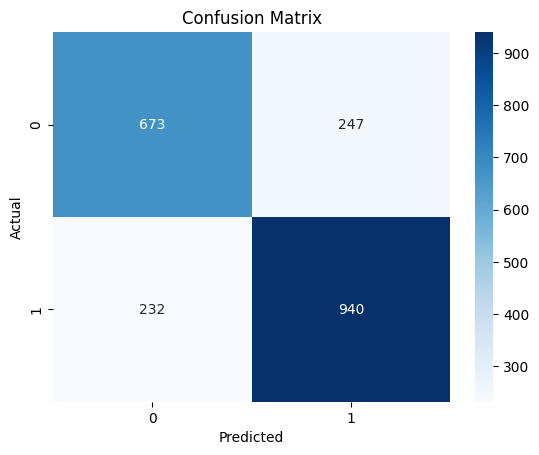

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


## Feature Importance

c:\Users\felix\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PermutationExplainer explainer: 211it [03:17,  1.06it/s]                         


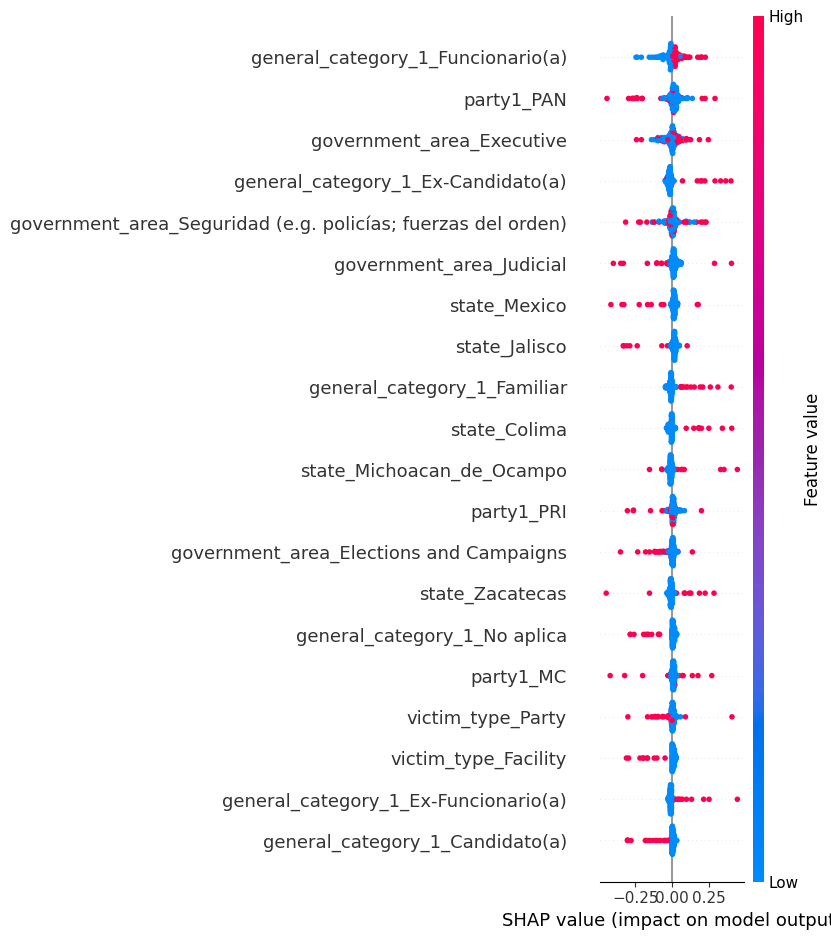

Permutation Importance Training Time: 198.67349863052368 seconds; 3.3112249771753945 minutes


In [59]:
import shap
start_time_permutation = time()
# Use a small sample for SHAP to work efficiently
X_train, X_test_std, y_train, y_test = train_test_split(X_train_std, y, test_size = 0.10, random_state = 0)

explainer = shap.Explainer(knn_final.predict, X_test_std)

shap_values = explainer(X_test_std)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_test_std)

training_time_permutation = time() - start_time_permutation
print(f"Permutation Importance Training Time: {training_time_permutation} seconds; {training_time_permutation/60} minutes")


## Prediction

In [60]:
Predict1 = pd.DataFrame({
    'Number': [999999],
    'ID': ['GRO-2024-11-17'],
    'event_id': [1000],
    'victim_id': [200],
    'victim_type': ['Authority'],  # Example type
    'victim_name': ['John Doe'],  # Hypothetical name
    'victim_gender': ['Male'],
    'party1': ['PRD'],  # Example party affiliation
    'party2': [None],
    'party3': [None],
    'party4': [None],
    'coallition': ['No'],
    '1stpoliticaloffice': ['Pre-Candidato del PRI a alcalde de Atoyac'],  # Example role
    '2ndpoliticaloffice': [None],
    '3rdpoliticaloffice': [None],
    'general_category_1': ['Pre-candidato(a)'],  # Example category
    'general_category_2': [None],
    'general_category_3': [None],
    'level_of_government': ['Municipal'],
    'government_area': ['Executive'],  # Example area
    'event_type': [None],  # To predict
    'aggressor': ['Unknown'],
    'remarks_on_the_crime': ['Details not available'],
    'date': ['2024-01-01'],  # Example date
    'state': ['Guerrero'],
    'municipal': ['Atoyac de Álvarez'],
    'INEGIcode': ['99999'],
    'MunINEGIcode': ['99999'],
    'Entity': ['ExampleEntity'],
    'Totalpopulation': [1000000],
    'Female_population': [500000],
    'Male_population': [500000],
    'economically_active_population': [600000],
    'No_health_services_pop': [200000],
    '12_year_old_single_population': [150000],
    'ID.1': [123.45],
    'avg_scholarity': [8.5],
    'home_count': [250000],
    'average_number_in_home': [4.0],
    'GDP': [500000.0],
    'Concepto': ['Guerrero']
})

Predict= Predict1.copy()
Predict = Predict.head(1)  # Only retain the first row if unintended rows exist.

Predict = Predict.drop(columns=["Totalpopulation","ID.1", "ID", "event_id", "Number", "victim_id", "date", "victim_name", "party2", "party3", "party4", "coallition", "1stpoliticaloffice", "2ndpoliticaloffice", "3rdpoliticaloffice", "general_category_2", "general_category_3",   "remarks_on_the_crime", "Concepto", "INEGIcode","MunINEGIcode","aggressor","municipal","level_of_government"])

Predict['Male_population_proportion'] = Predict['Male_population'] / (Predict['Male_population'] + Predict['Female_population'])
Predict['Female_population_proportion'] = Predict['Female_population'] / (Predict['Male_population'] + Predict['Female_population'])
Predict['No_health_proportion'] = Predict['No_health_services_pop'] / (Predict['Male_population'] + Predict['Female_population'])
Predict['12_year_proportion'] = Predict['12_year_old_single_population'] / (Predict['Male_population'] + Predict['Female_population'])
Predict = Predict.drop(columns=['Male_population', 'Female_population', 'economically_active_population', 'Male_population_proportion','No_health_services_pop','12_year_old_single_population'])


# Select only object (string) columns for dummy encoding
string_col = Predict.select_dtypes(include=['object']).columns
dummy = pd.get_dummies(Predict[string_col], drop_first=True, dtype=int)

# Proceed as before
Predict = pd.concat([Predict, dummy], axis=1)
Predict = Predict.drop(columns=string_col)


if 'event_type' not in Predict.columns:
    Predict['event_type'] = None



X_Predict = Predict.drop(columns=['event_type'])

# Align features between training and prediction data
# Get trained feature names
trained_features = knn_final.feature_names_in_

# Add missing columns to prediction data and set them to 0
for feature in trained_features:
    if feature not in X_Predict.columns:
        X_Predict[feature] = 0

# Remove columns not in the trained model
X_Predict = X_Predict[trained_features]



X_Predict_std = X_Predict.copy()
X_Predict_std = pd.DataFrame(scaler.fit_transform(X_Predict_std), columns = X_Predict.columns)

prediction = knn_final.predict(X_Predict_std)

print(f"for: {Predict1}")

if prediction == 0:
    prediction = 'Other Attack'
    print(f"Predicted event type: {prediction}\n\n")
elif prediction == 1:
    prediction = 'Murder'
    print(f"Predicted event type: {prediction}\n\n")

for:    Number              ID  event_id  victim_id victim_type victim_name  \
0  999999  GRO-2024-11-17      1000        200   Authority    John Doe   

  victim_gender party1 party2 party3  ... Male_population  \
0          Male    PRD   None   None  ...          500000   

  economically_active_population No_health_services_pop  \
0                         600000                 200000   

  12_year_old_single_population    ID.1 avg_scholarity home_count  \
0                        150000  123.45            8.5     250000   

  average_number_in_home       GDP  Concepto  
0                    4.0  500000.0  Guerrero  

[1 rows x 41 columns]
Predicted event type: Murder




C:\Users\felix\AppData\Local\Temp\ipykernel_26840\3991723513.py:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_Predict[feature] = 0
C:\Users\felix\AppData\Local\Temp\ipykernel_26840\3991723513.py:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_Predict[feature] = 0
C:\Users\felix\AppData\Local\Temp\ipykernel_26840\3991723513.py:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd

## Cross Validation

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN
knn = KNeighborsClassifier(n_neighbors=best_n_KNN)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(knn_final, X_train, y_train, cv=5, scoring='accuracy')

# Display the average accuracy across all 5 folds
print(f"Mean cross-validation accuracy: {cv_scores.mean()}")
print(f"Standard deviation of accuracy: {cv_scores.std()}")


Mean cross-validation accuracy: 0.6572831423895253
Standard deviation of accuracy: 0.010082018134805902


In [62]:
from sklearn.model_selection import LeaveOneOut

# Initialize LOOCV
loo = LeaveOneOut()

# Apply LOOCV to KNN
cv_scores_loocv = cross_val_score(knn_final, X_train, y_train, cv=loo, scoring='accuracy')

# Display the results
print(f"Mean LOOCV accuracy: {cv_scores_loocv.mean()}")


Mean LOOCV accuracy: 0.6413390010626993


In [63]:
from sklearn.model_selection import StratifiedKFold

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5)

# Perform Stratified K-Fold cross-validation
cv_scores_stratified = cross_val_score(knn_final, X_train, y_train, cv=stratified_kfold, scoring='accuracy')

print(f"Mean Stratified K-Fold accuracy: {cv_scores_stratified.mean()}")


Mean Stratified K-Fold accuracy: 0.6572831423895253


In [64]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}

# Initialize GridSearchCV with KNN and 5-fold cross-validation
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=20, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")


Best parameters: {'n_neighbors': 19}
Best cross-validation score: 0.6939305711086227
